**GPU CHECK**

In [1]:
import torch

print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU name:", torch.cuda.get_device_name(0))
else:
    print("⚠️ No GPU found. Go to Runtime > Change runtime type > GPU")


PyTorch version: 2.9.0+cu126
CUDA available: False
⚠️ No GPU found. Go to Runtime > Change runtime type > GPU


**Ultralytics YOLO install + import**

In [1]:
!pip install ultralytics -q

from ultralytics import YOLO
print("Ultralytics YOLO imported successfully ✅")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.1 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics YOLO imported successfully ✅


**Pre-trained YOLO model load**

In [2]:
from ultralytics import YOLO

# small, fast model
model = YOLO("yolov8n.pt")
print("Model loaded ✅")


Model loaded ✅


**Test prediction on sample bus image**

In [3]:
# Run prediction on sample image from Ultralytics
results_sample = model("https://ultralytics.com/images/bus.jpg")

print("Sample prediction done. Saved folder:", results_sample[0].save_dir)



image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 72.5ms
Speed: 10.0ms preprocess, 72.5ms inference, 6.9ms postprocess per image at shape (1, 3, 640, 480)
Sample prediction done. Saved folder: /content/runs/detect/predict


**Uploading Image**

In [4]:
from google.colab import files

uploaded = files.upload()

# Jo file upload hui hai uska naam le lo
image_path = list(uploaded.keys())[0]
print("Uploaded image:", image_path)


Saving bus.jpg to bus (1).jpg
Uploaded image: bus (1).jpg


**Yolo detection on image**

In [5]:
# Detection + annotated image save
results = model(image_path, save=True)   # save=True important

print("✅ Detection completed")
print("Detections (objects):", len(results[0].boxes))
print("Output folder:", results[0].save_dir)



image 1/1 /content/bus (1).jpg: 640x480 4 persons, 1 bus, 1 stop sign, 7.4ms
Speed: 3.3ms preprocess, 7.4ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/runs/detect/predict
✅ Detection completed
Detections (objects): 6
Output folder: /content/runs/detect/predict


**Image with bounding boxes**

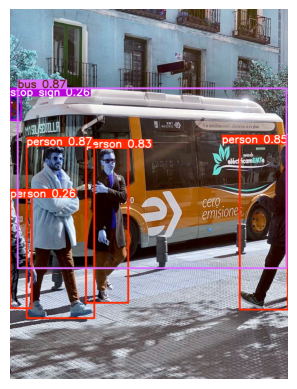

In [6]:
import matplotlib.pyplot as plt


annotated_img = results[0].plot()

plt.imshow(annotated_img)
plt.axis('off')
plt.show()
